In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

con = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
sor = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

austin_weather['MONTH'] = austin_weather.DATE.map(lambda x: con[x])

seattle_weather['MONTH'] = seattle_weather.DATE.map(lambda x: con[x])
seattle_weather = seattle_weather.groupby('MONTH',as_index=False).agg(np.mean)
seattle_weather = seattle_weather.sort_values(by='DATE') #<--gotta sort the month, otherwise the graph will be ugry


## another way is to turn MONTH into categories and set the order. However, it gives error when graph.
# seattle_weather['MONTH'] = pd.Categorical(seattle_weather['MTH'],categories=sor,ordered=True)
# seattle_weather = seattle_weather.sort_values(by='MONTH')



climate_change = pd.read_csv('climate_change.csv',parse_dates=['date'],index_col='date')

medals = pd.read_csv('medals_by_country_2016.csv',index_col=0)  #<-setting the first col as index

summer = pd.read_csv('summer2016.csv')



In [1]:
fig,ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b',marker='o',linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r',marker='v',linestyle='--')

# Customize the x-axis label
ax.set_xlabel("Time (months)") 

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')

# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

### Alternatively, can use the following code:
# plt.gca().set(xlabel='Time (months)',ylabel='Precipitation (inches)',title='Weather patterns in Austin and Seattle')

# Call show to display the resulting plot
plt.show()



NameError: name 'plt' is not defined

Creating small multiples with plt.subplots

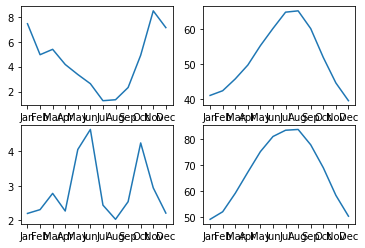

In [3]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['MONTH'],austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1].plot(austin_weather['MONTH'],austin_weather['MLY-TAVG-NORMAL'])
plt.show()

Small multiples with shared y axis

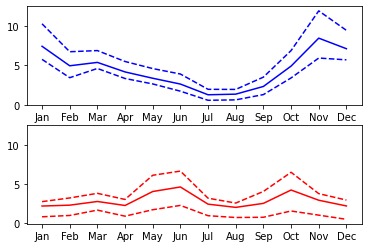

In [4]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b',linestyle='-')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b',linestyle='--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b',linestyle='--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color = 'r',linestyle='-')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r',linestyle='--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r',linestyle='--')

plt.show()

Plot time-series data

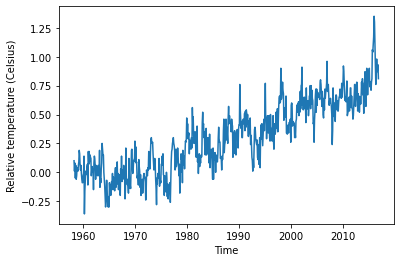

In [5]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index,climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

Using a time index to zoom in

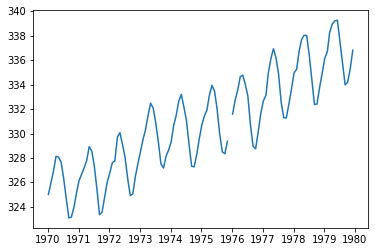

In [6]:
# Use plt.subplots to create fig and ax
fig,ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

Plotting two variables

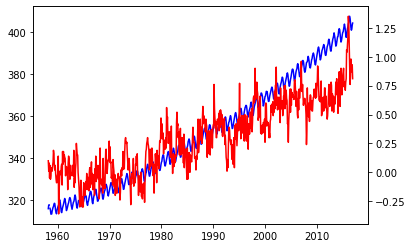

In [7]:
# Initalize a Figure and Axes
fig,ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index,climate_change['relative_temp'],color='r')

plt.show()

Annotating a plot of time-series data

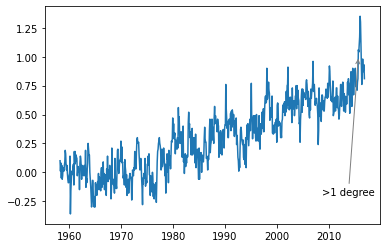

In [8]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index,climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
# ax.annotate('>1 degree',(pd.Timestamp('2015-10-06'),1))
ax.annotate('>1 degree',xytext=[pd.Timestamp('2008-10-06'),-0.2],xy=[pd.Timestamp('2015-10-06'),1],
            arrowprops={"arrowstyle":'->','color':'gray'})

## xytext[x,y] #<-control the position of the text
## xy <-control the position of the point of the arrow


plt.show()

Bar Chart

<ipython-input-9-2d964ad8b789>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


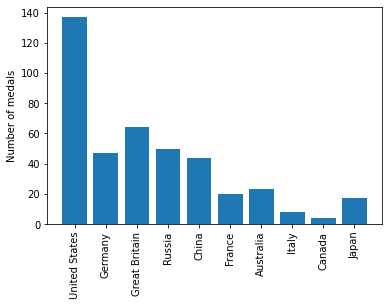

In [9]:
fig, ax = plt.subplots()



# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index,medals["Gold"])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()




staked bar chart

<ipython-input-10-32595df7483a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation=90) #<-to turn the xticklabels


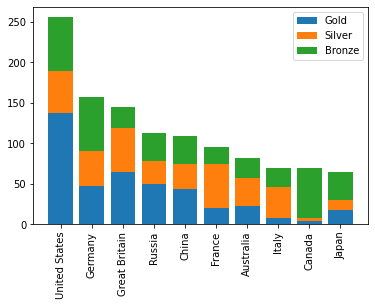

In [10]:
# Add bars for "Gold" with the label "Gold"
fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], label="Silver",bottom=medals["Gold"])  
#<-Call the ax.bar method to stack "Silver" bars on top of that, using the bottom key-word argument so the bottom of the bars will be on top of the gold medal bars, and label to add the label "Silver".

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], label="Bronze",bottom=medals["Silver"] + medals["Gold"])

ax.set_xticklabels(medals.index,rotation=90) #<-to turn the xticklabels

# Display the legend
ax.legend()

plt.show()

Creating Histogram

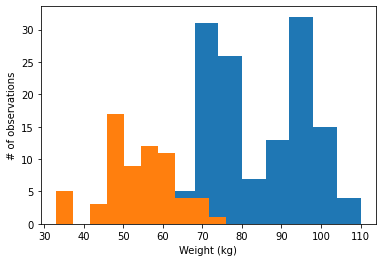

In [11]:
mens_rowing = summer[summer.Sport=='Rowing']
mens_gymnastics = summer[summer.Sport=='Gymnastics']

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()


"Step" histogram

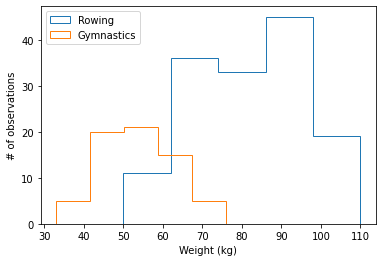

In [12]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"],histtype="step",label="Rowing",bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"],histtype="step",label="Gymnastics",bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend(loc='upper left')  #<- 'best','upper left', 'upper right', 'lower left', 'lower right' ,
# 'upper center', 'lower center', 'center left', 'center right'

plt.show()

Adding error-bars to a bar chart

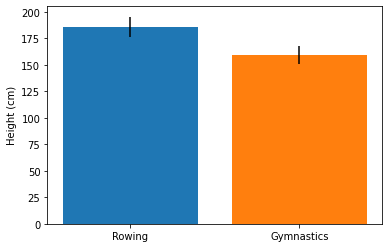

0.7856688358457841

In [13]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(),yerr=mens_rowing['Height'].std())  #<-using the SS instead of SE convey different meaning, see below

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(),yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()


## cal SE
mens_rowing['Height'].std()/np.sqrt(len(mens_rowing))

## Use the standard deviations for the error bars
#the length of the error bars is the standard deviation at each time point. This is the easiest graph to explain because the standard deviation is 
# directly related to the data. The standard deviation is a measure of the variation in the data. If the data at each time point are normally distributed, 
# then (1) about 64% of the data have values within the extent of the error bars, and (2) almost all the data lie within three times the extent of the 
# error bars.
# The main advantage of this graph is that a "standard deviation" is a term that is familiar to a lay audience. The disadvantage is that 
# the graph does not display the accuracy of the mean computation. For that, you need one of the other statistics.


## Use the standard error for the error bars
#the length of the error bars is the standard error of the mean (SEM). This is harder to explain to a lay audience because it in an inferential 
# statistic. A qualitative explanation is that the SEM shows the accuracy of the mean computation. Small SEMs imply better accuracy than larger SEMs.

# A quantitative explanation requires using advanced concepts such as "the sampling distribution of the statistic" and 
# "repeating the experiment many times." For the record, the SEM is an estimate of the standard deviation of the sampling distribution of the mean. 
# Recall that the sampling distribution of the mean can be understood in terms of repeatedly drawing random samples from the population and computing 
# the mean for each sample. The standard error is defined as the standard deviation of the distribution of the sample means.

Adding error-bars to a plot

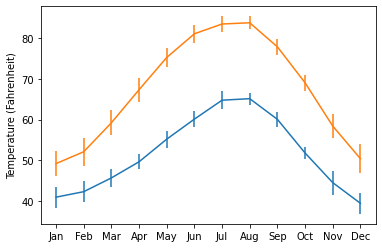

In [14]:
fig, ax = plt.subplots()

#plot the mean temperature across months and add the standard deviation at each point as y errorbars.
# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], yerr=austin_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

Creating BoxPlot

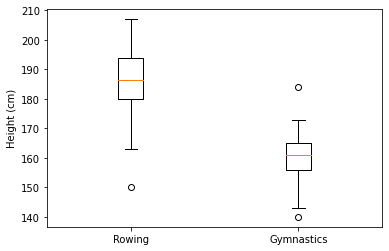

In [15]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"],mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing","Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

Simple scatter plot with encoding time by color

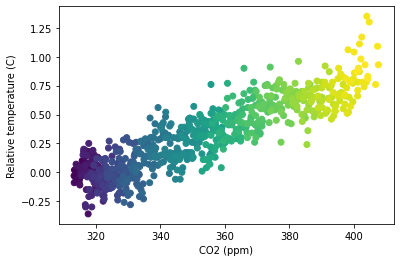

In [16]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'],climate_change['relative_temp'],c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

Switching between styles and saving file

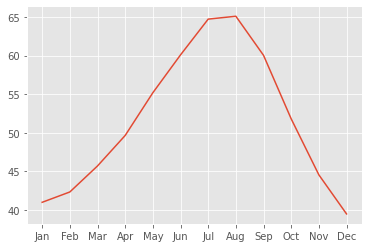

In [17]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use("ggplot")
fig,ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

fig.savefig("my_figure_300dpi.png",dpi=300)

# Set figure dimensions and save as a PNG
fig.set_size_inches([3,5])   #<-The first sets the width and the second sets the height of the figure.
fig.savefig('figure_3_5.png')

automated to adapt to the data that it receives as input

<ipython-input-18-72c0c1dfd311>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


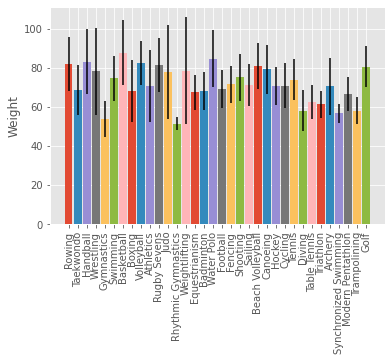

In [18]:
fig, ax = plt.subplots()

sports_column = summer['Sport']

sports = sports_column.unique()

for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer[summer["Sport"]==sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport,sport_df['Weight'].mean(),yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
plt.show()
# fig.savefig("sports_weights.png")